In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data2/Sdf16_1a.txt', sep='\t')

/Users/sarthak/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


# Problem 1

Rank and visualize the states that take in the most federal funding (revenue).
Which states spend the most federal funding per student?

In [37]:
states = df[['STNAME', 'TFEDREV', 'TOTALEXP', 'V33']]
states = states.groupby(['STNAME']).sum().reset_index().sort_values(by='TFEDREV')
states['TotalPerStudent'] = states['TOTALEXP'] / states['V33'] 
states.head()

,STNAME,TFEDREV,TOTALEXP,V33,TotalPerStudent
45,Vermont,111890912,2102744912,86273,24373.151647
50,Wyoming,123011974,2034228974,94709,21478.729308
7,Delaware,144706995,2218344995,134840,16451.683440
34,North Dakota,155452961,1963629961,108530,18092.969326
29,New Hampshire,169165780,3124777780,179514,17406.875118


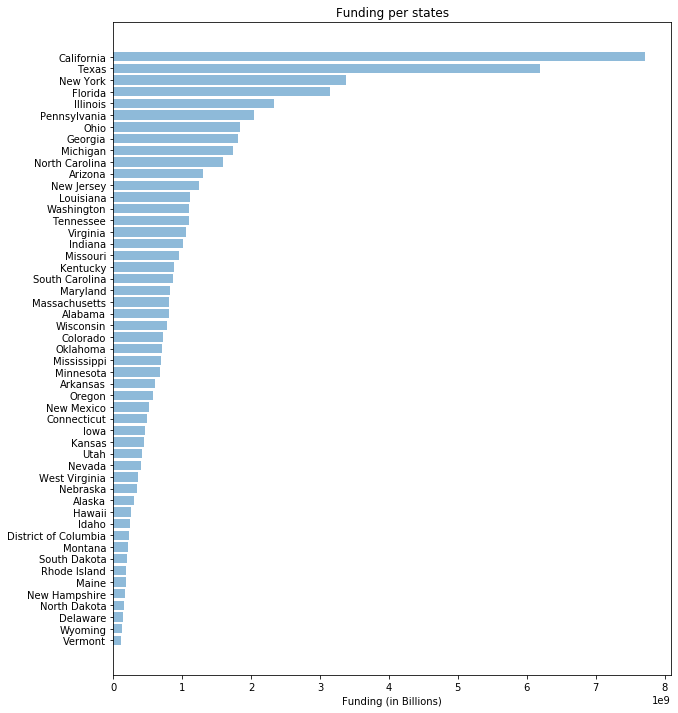

Top 10 states with highest spending per students are


,STNAME,TotalPerStudent
0,District of Columbia,27321.558193
1,New York,25234.981198
2,Vermont,24373.151647
3,New Jersey,21640.774037
4,Wyoming,21478.729308
5,Connecticut,20976.924089
6,Alaska,19799.769017
7,Pennsylvania,19216.042560
8,Massachusetts,18335.450837
9,North Dakota,18092.969326


In [41]:
plt.figure(figsize=(10,12))
plt.barh(states['STNAME'], states['TFEDREV'], align='center', alpha=0.5)
y_pos = np.arange(len(states))
plt.yticks(y_pos, states['STNAME'])
plt.xlabel('Funding (in Billions)')
plt.title('Funding per states')
plt.show()
print('Top 10 states with highest spending per students are')
states.sort_values(by='TotalPerStudent', ascending=False).head(10).reset_index()[['STNAME', 'TotalPerStudent']]